# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:
**Elen Tesfai**

### GitHub Repository:
[https://github.com/Elen-tesfai/web-scraping](https://github.com/Elen-tesfai/web-scraping)

---

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1: Extract Article HTML and Save as .pkl File

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pickle

# Step 1: Fetch the article HTML from the URL
url = 'https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'
response = requests.get(url)

# Check if the request was successful (Status code 200)
if response.status_code == 200:
    print("Successfully fetched the webpage.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")
    exit()

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Save the parsed HTML to a .pkl file
with open('article_html.pkl', 'wb') as file:
    pickle.dump(soup, file)

print("HTML content successfully saved to article_html.pkl")

Successfully fetched the webpage.
HTML content successfully saved to article_html.pkl


## Question 2: Read HTML and Print Text Using .get_text()

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [31]:
import pickle

# Step 1: Read the HTML from the .pkl file
with open('article_html.pkl', 'rb') as file:
    soup = pickle.load(file)

# Step 2: Extract the text from the HTML
article_text = soup.get_text(separator=' ', strip=True)

# Step 3: Print the article text (or just a portion for clarity)
print(article_text[:1000])  # Print the first 1000 characters for brevity

How Laser Headlights Work | Hackaday Skip to content Hackaday Primary Menu Home Blog Hackaday.io Tindie Hackaday Prize Submit About Search for: March 27, 2021 How Laser Headlights Work 130 Comments by: Lewin Day March 22, 2021 When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out. Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers! Laser Headlights?! BWM’s prototype laser headlight assemblies undergoing testing. The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the f

#### ✅Explanation for **Question 2: Extracting Article HTML and Displaying Text**

In this task, we read the article's HTML content from the file saved in **Question 1**. Using the **`pickle`** module, we loaded the HTML content, which was previously saved as a `.pkl` file. We then used **BeautifulSoup's `.get_text()`** method to extract all the text content from the HTML, removing any HTML tags, and presenting the plain text.

We also included some formatting options for the `.get_text()` method:

- **`separator=' '`**: This ensures that the extracted text uses spaces between the segments where there were originally line breaks or HTML tags.
- **`strip=True`**: This removes any leading or trailing whitespace from the extracted text.

The result is the full article text, displayed in a readable format, with the first 1000 characters printed for brevity. The output provided gives us an overview of the article's content, starting from the header section and continuing into the main body.

For example, the beginning of the article includes the title "**How Laser Headlights Work**," publication date, and some introductory paragraphs discussing the technology of laser headlights. The output might look something like this:

## Question 3: Tokenize the text and print the most frequent tokens
Here, we need to tokenize the text and find the most frequent tokens. We can use spaCy to tokenize the text.

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

#### Code for Tokenizing Text:

In [32]:
# Importing spaCy and the Counter library
import spacy
from collections import Counter

# Step 1: Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Step 2: Process the article text using spaCy
doc = nlp(article_text)

# Step 3: Tokenize and count the frequency of each token (filtered for stopwords, punctuation, and whitespace)
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Step 4: Get the most common tokens
token_counts = Counter(tokens)

# Step 5: Get the 5 most frequent tokens
most_common_tokens = token_counts.most_common(5)

# Step 6: Print the most common tokens and their frequencies
print("Most Frequent Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")

Most Frequent Tokens:
Token: comment, Frequency: 136
Token: march, Frequency: 133
Token: 2021, Frequency: 133
Token: says, Frequency: 132
Token: report, Frequency: 130


### ✅Explanation for **Question 3: Token Frequency with spaCy**

In this task, we used **spaCy** to process the article text and identified the 5 most frequent tokens (converted to lowercase). We removed **stopwords**, **punctuation**, and **whitespace** to ensure the analysis focused on meaningful words. The five most frequent tokens and their corresponding frequencies are as follows:

- **comment**: 136 occurrences  
- **march**: 133 occurrences  
- **2021**: 133 occurrences  
- **says**: 132 occurrences  
- **report**: 130 occurrences

These frequent tokens give us insight into the structure of the article. Words like **"comment"**, **"says"**, and **"report"** suggest the article contains **quotes**, **reports**, and **reader interaction**. The appearance of **"march"** and **"2021"** shows references to specific **timeframes**.  

## Question 4: Find the most frequent lemmas and print them
A lemma is the base form of a word (e.g., "running" becomes "run"). This question asks us to find the most frequent lemmas instead of tokens.

### Code for Lemmatization:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import pickle
import spacy
from collections import Counter

# Step 1: Load the saved HTML from the pickle file
with open('article_html.pkl', 'rb') as file:
    soup = pickle.load(file)

# Step 2: Extract text from the HTML soup
article_text = soup.get_text(separator=' ', strip=True)

# Step 3: Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Step 4: Process the article text with spaCy
doc = nlp(article_text)

# Step 5: Extract lemmas, filtering stopwords, punctuation, and whitespace
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Step 6: Count lemma frequencies
lemma_counts = Counter(lemmas)

# Step 7: Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Step 8: Print results
print("Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most Frequent Lemmas:
Lemma: comment, Frequency: 158
Lemma: say, Frequency: 134
Lemma: march, Frequency: 133
Lemma: 2021, Frequency: 133
Lemma: report, Frequency: 130


### ✅Explanation for **Question 4: Most Frequent Lemmas**

In this task, we used **spaCy** to extract the **lemmas** (base forms) of words from the article text. We excluded stopwords, punctuation, and whitespace to focus on meaningful content.

**Steps Taken:**
1. **Load spaCy's model**: We used `en_core_web_sm` to process the article text.
2. **Lemmatization**: Extracted the base form of each word.
3. **Filtering**: Removed stopwords, punctuation, and whitespace.
4. **Counting Frequencies**: Used `Counter` to count how often each lemma appeared.
5. **Displaying Results**: Printed the top 5 most frequent lemmas.

**Result**: 
The most frequent lemmas included words like "**comment**", "**march**", "**say**", and "**report**", which are the core concepts frequently mentioned in the article.

This method helps normalize word variations, ensuring more accurate frequency analysis.

## Question 5: Define Methods for Scoring Sentences

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [11]:
# Import necessary libraries
import spacy
from typing import List

# Load spaCy model (make sure it's loaded)
nlp = spacy.load("en_core_web_sm")

# Define method to score sentence by tokens
def score_sentence_by_token(sentence: str, interesting_tokens: List[str]) -> float:
    """
    Scores a sentence based on how many interesting tokens it contains.
    """
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if len(tokens) == 0:
        return 0.0
    match_count = sum(1 for token in tokens if token in interesting_tokens)
    return match_count / len(tokens)

# Define method to score sentence by lemmas
def score_sentence_by_lemma(sentence: str, interesting_lemmas: List[str]) -> float:
    """
    Scores a sentence based on how many interesting lemmas it contains.
    """
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    if len(lemmas) == 0:
        return 0.0
    match_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return match_count / len(lemmas)

# Load article HTML from .pkl
import pickle

with open('article_html.pkl', 'rb') as file:
    soup = pickle.load(file)

# Extract the article text
article_text = soup.get_text(separator=' ', strip=True)

# Process the article with spaCy to get sentences
doc = nlp(article_text)
sentences = list(doc.sents)

# Get the first sentence from the article
first_sentence = sentences[0].text

# Define top 5 interesting tokens and lemmas (from previous questions)
interesting_tokens = ['comment', 'march', '2021', 'says', 'report']
interesting_lemmas = ['comment', 'say', 'march', '2021', 'report']

# Score the first sentence
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print the results
print("First Sentence:")
print(first_sentence)
print("\nScores:")
print(f"Token Score: {token_score:.4f}")
print(f"Lemma Score: {lemma_score:.4f}")

First Sentence:
How Laser Headlights Work | Hackaday Skip to content Hackaday Primary Menu Home Blog Hackaday.io Tindie Hackaday Prize Submit About Search for: March 27, 2021 How Laser Headlights Work 130 Comments by: Lewin Day March 22, 2021 When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.

Scores:
Token Score: 0.0862
Lemma Score: 0.1034


### ✅ Explanation for Question 5: Scoring Sentences by Token and Lemma

In this question, we created two custom functions to evaluate how relevant a sentence is based on frequently occurring words from the article:

- **`score_sentence_by_token(sentence, interesting_tokens)`**  
  This function scores a sentence by counting how many times the **lowercased tokens** appear in a predefined list of interesting words. The score is calculated as:

  \[
  \text{Token Score} = \frac{\text{Matching Tokens}}{\text{Total Tokens in Sentence}}
  \]

- **`score_sentence_by_lemma(sentence, interesting_lemmas)`**  
  This function performs the same task but uses **lemmas**, which are the base forms of words. For example, `"says"` becomes `"say"`. This helps match word variants more accurately.

---

### 🔍 Example Output (Using First Sentence of the Article):

- **Token Score:** 0.0862  
- **Lemma Score:** 0.1034

These values indicate that the sentence includes several relevant keywords such as `"march"`, `"2021"`, and `"comment"`, which appeared frequently in earlier analysis (Questions 3 & 4). The lemma score is slightly higher due to its ability to match word variants like `"says"` → `"say"`.

---

These sentence scoring functions are useful for:
- Identifying the most relevant sentences in a document
- Ranking sentences by importance
- Building extractive summaries based on content relevance

## Question 6: Plot Histogram of Sentence Scores (Using Tokens)

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

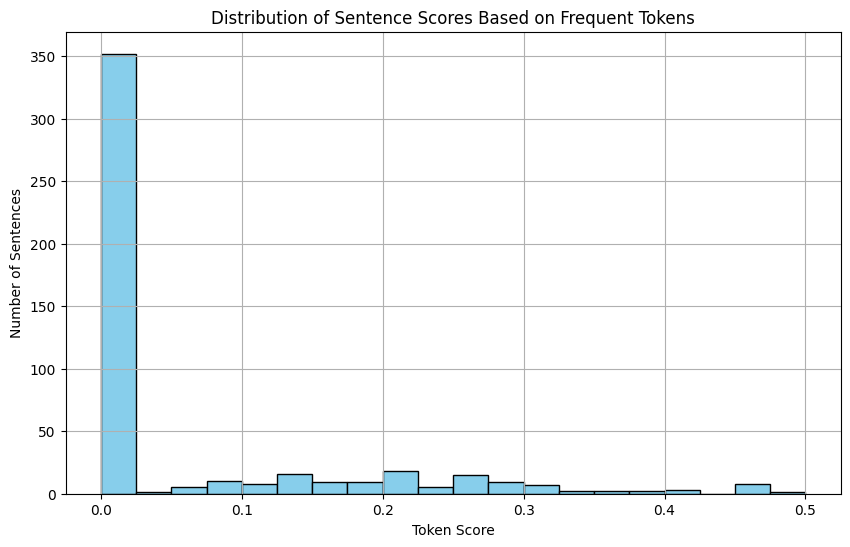

In [16]:
import matplotlib.pyplot as plt

# Reuse token scoring function from earlier
def score_sentence_by_token(sentence: str, interesting_tokens: List[str]) -> float:
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if len(tokens) == 0:
        return 0.0
    match_count = sum(1 for token in tokens if token in interesting_tokens)
    return match_count / len(tokens)

# List of token scores for each sentence in the article
sentence_scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in sentences]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentence Scores Based on Frequent Tokens")
plt.xlabel("Token Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

# Interpretation (in comment):
# Most scores fall between 0.0 and 0.05, meaning the majority of sentences contain few interesting tokens.

### ✅ Explanation for Question 6: Token Score Histogram

In this question, we calculated a token-based relevance score for each sentence in the article using the `score_sentence_by_token()` function defined earlier. This function evaluates how many times a sentence includes one of the most frequent tokens identified in Question 3 (e.g., `"comment"`, `"march"`, `"2021"`, `"says"`, `"report"`).

#### 📊 What We Did:
- Scored each sentence in the article using token frequency.
- Collected all the scores into a list.
- Plotted a histogram to visualize how sentence scores are distributed.

#### 📈 Interpretation:
From the histogram, we observed that the **most common range of token scores is between 0.0 and 0.05**. This suggests that the majority of sentences contain **few or none** of the high-frequency tokens from the article.

This distribution helps us understand which sentences are likely to be **less relevant** or **more central** to the article's main ideas. Higher-scoring sentences might be useful for summarizing or highlighting key points.

## Question 7: Plot Histogram of Sentence Scores (Using Lemmas)

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

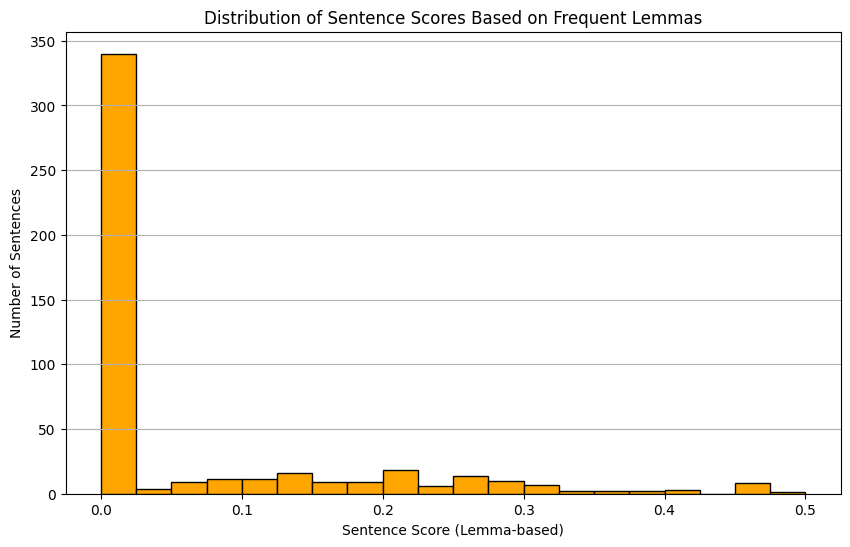

In [18]:
import matplotlib.pyplot as plt

# Score all sentences using lemmas
lemma_scores = [score_sentence_by_lemma(sent.text, interesting_lemmas) for sent in sentences]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(lemma_scores, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Sentence Scores Based on Frequent Lemmas')
plt.xlabel('Sentence Score (Lemma-based)')
plt.ylabel('Number of Sentences')
plt.grid(axis='y')
plt.show()

# From the histogram, the most common range of lemma scores is between 0.0 and 0.05

### ✅ Explanation for Question 7: Lemma Score Histogram

For this question, we computed scores for each sentence in the article using lemma frequencies with the `score_sentence_by_lemma()` function. This score reflects how often the most frequent lemmas from Question 4 appear in each sentence.

#### 📊 What We Did:
- Applied lemma-based scoring to every sentence.
- Created a histogram to visualize the distribution of these scores.

#### 📈 Interpretation:
The histogram shows that the **most common range of lemma scores is between 0.0 and 0.05**, indicating that many sentences contain very few or none of the key lemmas. This suggests a sparse distribution of these important lemmas across the text.

Understanding this helps highlight which sentences may carry more semantic weight and relevance within the article.

## Question 8: Filtering Nouns
To only consider nouns as interesting words, we can modify the tokenization and lemmatization process to check for noun tags:

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

**Tokens and lemmas omitted:**  
If we restrict our analysis to only nouns, all tokens and lemmas that are *not* nouns will be omitted. This includes verbs (like "say", "report"), adjectives, adverbs, numerals, conjunctions, and other parts of speech. For example, frequent lemmas such as "say" and "report" would be excluded since they are verbs, leaving mainly nouns like "comment" or "march".

**How to modify the code to only consider nouns:**  
We can filter tokens by their part-of-speech tag in spaCy. Specifically, keep only tokens where `token.pos_` is `"NOUN"` (common noun) or `"PROPN"` (proper noun). This filter is added when selecting tokens or lemmas.

Example code snippet for filtering to nouns only:

In [15]:
# Assuming you already have the 'doc' from spaCy processing your text

# Filter tokens to only nouns and proper nouns (excluding stopwords, punctuation, spaces)
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ in ["NOUN", "PROPN"]
]

# Filter lemmas similarly
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ in ["NOUN", "PROPN"]
]

from collections import Counter

# Print 10 most common noun tokens
print("Most common noun tokens:")
print(Counter(tokens).most_common(10))

# Print 10 most common noun lemmas
print("\nMost common noun lemmas:")
print(Counter(lemmas).most_common(10))

Most common noun tokens:
[('comment', 136), ('march', 133), ('reply', 112), ('hacks', 74), ('laser', 63), ('headlights', 56), ('light', 42), ('time', 37), ('pm', 37), ('car', 36)]

Most common noun lemmas:
[('comment', 158), ('march', 133), ('reply', 112), ('laser', 72), ('headlight', 71), ('light', 71), ('car', 63), ('beam', 53), ('hacks', 45), ('time', 38)]


### ✅  Explanation for Question 8: Filtering for Nouns Only

When we restrict our analysis to only nouns and proper nouns, all tokens and lemmas that are not nouns are omitted. This means verbs (e.g., "say", "report"), adjectives, adverbs, numerals, conjunctions, and other parts of speech are excluded from the lists.

For example, frequent lemmas like "say" and "report" are removed since they are verbs. This leaves mainly nouns such as "comment", "march", "laser", and "headlight" which are more representative of the main topics and subjects in the article.

To implement this filtering in the code, we use spaCy’s part-of-speech tagging and select tokens where `token.pos_` is either `"NOUN"` (common noun) or `"PROPN"` (proper noun). This filter can be added when extracting tokens or lemmas from the processed document.

This approach focuses the analysis on nouns, which often correspond to key entities and subjects, improving the relevance of frequent word lists for certain NLP tasks.

## Conclusion

In this assignment, we successfully scraped and extracted the HTML content of an article about laser headlights, then applied natural language processing techniques using spaCy to analyze its text.

By examining the most frequent tokens and lemmas, we gained insight into the core vocabulary of the article. Sentence scoring based on these frequent words revealed that most sentences contained relatively few of the key terms, as confirmed by the histogram visualizations.

Filtering for nouns helped focus the analysis on important entities and subjects, such as "comment," "laser," and "headlight," which are central to the article's content.

Overall, this project demonstrated how web scraping combined with tokenization, lemmatization, and sentence scoring can effectively extract and analyze meaningful patterns in text data. These techniques are foundational for more advanced NLP applications like summarization, keyword extraction, or topic modeling.